In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def find_movie_title(id):
    row = movies.loc[movies['movieId'] == id]
    return row['title']

In [3]:
data_path = '../raw_data/ml-25m/'
movies = pd.read_csv(data_path + 'movies.csv')
ratings = pd.read_csv(data_path + 'ratings.csv')

In [4]:
ratings = ratings.merge(movies[['movieId', 'title']], on='movieId')

In [5]:
ratings

,userId,movieId,rating,timestamp,title
0,1,296,5.0,1147880044,Pulp Fiction (1994)
1,3,296,5.0,1439474476,Pulp Fiction (1994)
2,4,296,4.0,1573938898,Pulp Fiction (1994)
3,5,296,4.0,830786155,Pulp Fiction (1994)
4,7,296,4.0,835444730,Pulp Fiction (1994)
...,...,...,...,...,...
25000090,162358,200192,2.0,1553453039,Den frusna leoparden (1986)
25000091,162358,200194,2.0,1553453843,Tough Luck (2004)
25000092,162386,139970,3.5,1549215965,I Don't Speak English (1995)
25000093,162386,200726,4.0,1554651417,The Graduates (1995)


In [6]:
ratings.userId.nunique()

162541

In [7]:
ratings.movieId.nunique()

59047

In [8]:
possible_rates = ratings.rating.unique()
np.sort(possible_rates, axis=0)

array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [16]:
ratings.title.value_counts().head(1000)

Forrest Gump (1994)                 81491
Shawshank Redemption, The (1994)    81482
Pulp Fiction (1994)                 79672
Silence of the Lambs, The (1991)    74127
Matrix, The (1999)                  72674
                                    ...  
Finding Forrester (2000)             6239
Miller's Crossing (1990)             6239
Chariots of Fire (1981)              6230
Streetcar Named Desire, A (1951)     6223
Producers, The (1968)                6181
Name: title, Length: 1000, dtype: int64

In [29]:
def get_most_rated_movies_df(ratings_df, top_number):
    most_rated_movies = ratings_df.movieId.value_counts().head(top_number).index
    return ratings_df[ratings_df.movieId.isin(most_rated_movies)].copy()

In [30]:
ratings_top = get_most_rated_movies_df(ratings, 1000)
ratings_top

,userId,movieId,rating,timestamp,title
0,1,296,5.0,1147880044,Pulp Fiction (1994)
1,3,296,5.0,1439474476,Pulp Fiction (1994)
2,4,296,4.0,1573938898,Pulp Fiction (1994)
3,5,296,4.0,830786155,Pulp Fiction (1994)
4,7,296,4.0,835444730,Pulp Fiction (1994)
...,...,...,...,...,...
21613743,162504,204,3.0,851692500,Under Siege 2: Dark Territory (1995)
21613744,162505,204,3.0,840104538,Under Siege 2: Dark Territory (1995)
21613745,162516,204,2.5,1175652894,Under Siege 2: Dark Territory (1995)
21613746,162517,204,5.0,1073909995,Under Siege 2: Dark Territory (1995)


In [51]:
rates_per_user = ratings_top.userId.value_counts()
rates_per_user

107650    1000
57548      994
72315      986
123711     975
162516     970
          ... 
55072        1
132964       1
88992        1
102450       1
26659        1
Name: userId, Length: 162506, dtype: int64

In [58]:
cumulative_rates_per_user = rates_per_user.cumsum()
cumulative_rates_per_user

107650        1000
57548         1994
72315         2980
123711        3955
162516        4925
            ...   
55072     15117389
132964    15117390
88992     15117391
102450    15117392
26659     15117393
Name: userId, Length: 162506, dtype: int64

<AxesSubplot:ylabel='userId'>

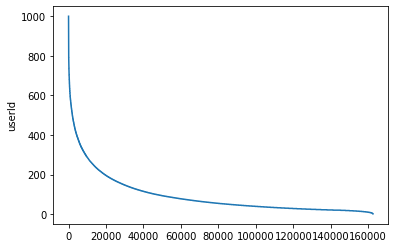

In [64]:
x_axis = list(range(1,len(rates_per_user)+1))
sns.lineplot(x=x_axis, y=rates_per_user)

<AxesSubplot:ylabel='userId'>

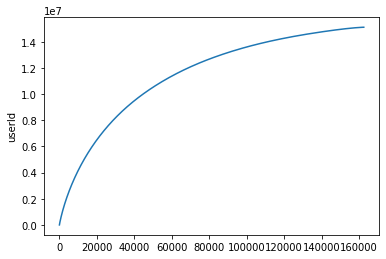

In [65]:
sns.lineplot(x=x_axis, y=cumulative_rates_per_user)

In [74]:
def get_users_with_min_num_of_ratings_df(ratings_df, min_num_of_ratings):
    rates_per_user = ratings_df.userId.value_counts()
    bolean_users_with_min_num_of_ratings = ratings_df.userId.value_counts() >= min_num_of_ratings
    users_with_min_num_of_ratings = rates_per_user[bolean_users_with_min_num_of_ratings].index
    return ratings_df[ratings_df.userId.isin(users_with_min_num_of_ratings)].copy()

In [73]:
bolean_users_rated_min_200 = ratings_top.userId.value_counts() >= 200
users_rated_min_200 = rates_per_user[bolean_users_rated_min_200].index
users_rated_min_200

Int64Index([107650,  57548,  72315, 123711, 162516,  89464,  20055, 143049,
             92046,  30643,
            ...
              2500,  75849,  59125,  96795, 158420, 102901,  88165, 133984,
             57576, 104889],
           dtype='int64', length=19342)

In [75]:
ratings_top_users_top = get_users_with_min_num_of_ratings_df(ratings_top, 200)
ratings_top_users_top

,userId,movieId,rating,timestamp,title
1,3,296,5.0,1439474476,Pulp Fiction (1994)
7,12,296,5.0,1119354604,Pulp Fiction (1994)
8,13,296,5.0,1238029599,Pulp Fiction (1994)
12,19,296,3.5,1466674637,Pulp Fiction (1994)
14,23,296,5.0,942964550,Pulp Fiction (1994)
...,...,...,...,...,...
21613717,161939,204,4.0,974694915,Under Siege 2: Dark Territory (1995)
21613720,162007,204,2.0,975974775,Under Siege 2: Dark Territory (1995)
21613726,162047,204,2.5,1459091602,Under Siege 2: Dark Territory (1995)
21613731,162145,204,3.0,865099912,Under Siege 2: Dark Territory (1995)


In [77]:
df_ = ratings_top.pivot(index='userId', columns='title', values='rating')
df_

title,(500) Days of Summer (2009),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),127 Hours (2010),"13th Warrior, The (1999)",2001: A Space Odyssey (1968),21 Grams (2003),21 Jump Street (2012),...,X-Men: The Last Stand (2006),X2: X-Men United (2003),You've Got Mail (1998),Young Frankenstein (1974),Young Guns (1988),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,4.0,4.0,NaN,NaN,NaN,NaN,4.0,3.5,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,4.0,4.5,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162538,4.5,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
df = ratings_top_users_top.pivot(index='userId', columns='title', values='rating')
df

title,(500) Days of Summer (2009),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),127 Hours (2010),"13th Warrior, The (1999)",2001: A Space Odyssey (1968),21 Grams (2003),21 Jump Street (2012),...,X-Men: The Last Stand (2006),X2: X-Men United (2003),You've Got Mail (1998),Young Frankenstein (1974),Young Guns (1988),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,4.0,4.0,NaN,NaN,NaN,NaN,4.0,3.5,NaN,NaN
12,3.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,NaN,4.0,NaN,NaN,NaN,NaN,3.5
13,NaN,NaN,NaN,NaN,NaN,NaN,3.5,3.5,NaN,NaN,...,3.0,3.5,NaN,5.0,3.5,NaN,4.0,3.5,NaN,NaN
19,NaN,NaN,2.5,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN
23,NaN,NaN,NaN,NaN,5.0,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162519,NaN,NaN,NaN,3.0,NaN,NaN,2.0,5.0,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
162521,NaN,NaN,NaN,NaN,NaN,NaN,4.5,4.0,NaN,NaN,...,4.0,4.0,NaN,NaN,NaN,NaN,4.5,2.5,NaN,NaN
162529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,NaN,NaN


In [80]:
df_3 = df.fillna(3).replace(0.5,1)
df_3

title,(500) Days of Summer (2009),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),127 Hours (2010),"13th Warrior, The (1999)",2001: A Space Odyssey (1968),21 Grams (2003),21 Jump Street (2012),...,X-Men: The Last Stand (2006),X2: X-Men United (2003),You've Got Mail (1998),Young Frankenstein (1974),Young Guns (1988),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,5.0,3.0,3.0,...,4.0,4.0,3.0,3.0,3.0,3.0,4.0,3.5,3.0,3.0
12,3.0,3.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,2.0,3.0,4.0,3.0,3.0,3.0,3.0,3.5
13,3.0,3.0,3.0,3.0,3.0,3.0,3.5,3.5,3.0,3.0,...,3.0,3.5,3.0,5.0,3.5,3.0,4.0,3.5,3.0,3.0
19,3.0,3.0,2.5,3.0,3.0,3.0,3.0,5.0,3.0,3.0,...,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.5,3.0
23,3.0,3.0,3.0,3.0,5.0,3.0,3.0,4.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162519,3.0,3.0,3.0,3.0,3.0,3.0,2.0,5.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
162521,3.0,3.0,3.0,3.0,3.0,3.0,4.5,4.0,3.0,3.0,...,4.0,4.0,3.0,3.0,3.0,3.0,4.5,2.5,3.0,3.0
162529,3.0,3.0,3.0,3.0,3.0,3.0,3.0,5.0,3.0,3.0,...,3.0,3.0,3.0,5.0,3.0,3.0,3.0,3.0,3.0,3.0
